In [2]:
%matplotlib inline


In [3]:
import pathlib
import json
import numpy as np
import time
import matplotlib.pyplot as plt

def flatten_metrics(metrics):
    flattened = {}
    flattened["CoLA"] = {
        "metric": "mcc",
        "mean": metrics['CoLA']['mcc'][0],
        "stdv": metrics['CoLA']['mcc'][1]
    }
    flattened["MNLI-mm"] = {
        "metric": "acc",
        "mean": metrics["MNLI"]["mnli-mm_acc"][0],
        "stdv": metrics["MNLI"]["mnli-mm_acc"][1]
    }
    
    flattened["MNLI"] = {
        "metric": "acc",
        "mean": metrics["MNLI"]["mnli_acc"][0],
        "stdv": metrics["MNLI"]["mnli_acc"][1]
    }
    flattened["MNLI-mm"] = {
        "metric": "acc",
        "mean": metrics["MNLI"]["mnli-mm_acc"][0],
        "stdv": metrics["MNLI"]["mnli-mm_acc"][1]
    }
    flattened["MRPC"] = {
        "metric": "acc",
        "mean": metrics["MRPC"]["acc"][0],
        "stdv": metrics["MRPC"]["acc"][1]
    }
    flattened["QNLI"] = {
        "metric": "acc",
        "mean": metrics["QNLI"]["acc"][0],
        "stdv": metrics["QNLI"]["acc"][1]
    }
    flattened["QQP"] = {
        "metric": "acc",
        "mean": metrics["QQP"]["acc"][0],
        "stdv": metrics["QQP"]["acc"][1]
    }
    flattened["RTE"] = {
        "metric": "acc",
        "mean": metrics["RTE"]["acc"][0],
        "stdv": metrics["RTE"]["acc"][1]
    }
    flattened["SST-2"] = {
        "metric": "acc",
        "mean": metrics["SST-2"]["acc"][0],
        "stdv": metrics["SST-2"]["acc"][1]
    }
    flattened["STS-B"] = {
        "metric": "corr",
        "mean": metrics["STS-B"]["pearson"][0],
        "stdv": metrics["STS-B"]["pearson"][1]
    }
    flattened["WNLI"] = {
        "metric": "acc",
        "mean": metrics["WNLI"]["acc"][0],
        "stdv": metrics["WNLI"]["acc"][1]
    }
    return flattened

def plot_task_metrics(experiment_metrics, task, title):
    experiment_metrics = [(name, flatten_metrics(metrics)) for name, metrics in experiment_metrics]
    
    experiment_names = [e_m[0] for e_m in experiment_metrics]
    metrics_data = [e_m[1] for e_m in experiment_metrics]
    
    x_pos = np.arange(len(experiment_names))
    means = [m[task]["mean"] for m in metrics_data]
    errors = [m[task]["stdv"] for m in metrics_data]
    fig, ax = plt.subplots()
    ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.5, ecolor='black')
    ax.set_ylabel(metrics_data[0][task]["metric"])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(experiment_names, rotation='vertical')
    ax.set_title(f"{title} : {task}")
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    plt.show()

def plot_all_task_metrics(metrics, title):
    for name in metrics[0][1].keys():
        plot_task_metrics(analyzed_metrics, name, title)


In [4]:
experiments_path = pathlib.Path("../experiments")

In [5]:
baseline_path = experiments_path / "baseline" / "results.json"
with baseline_path.open() as f:
    baseline = json.load(f)


In [6]:
freq_baseline_path = experiments_path / "freq_baseline" / "results.json"
with freq_baseline_path.open() as f:
    freq_baseline = json.load(f)


# Comparison across Components

## Randomization

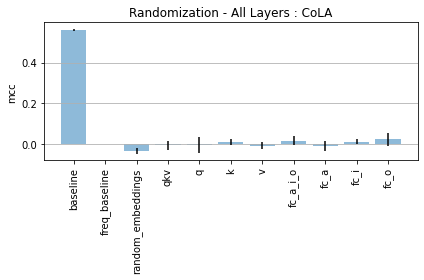

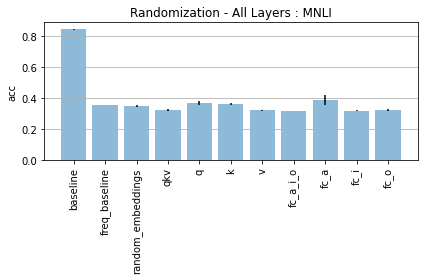

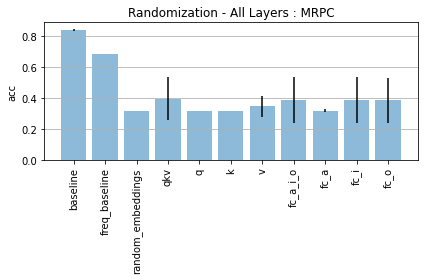

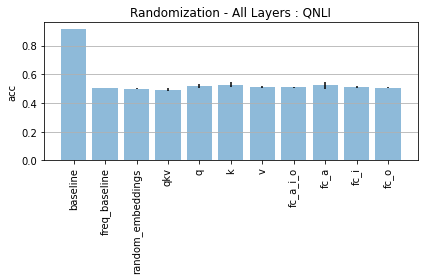

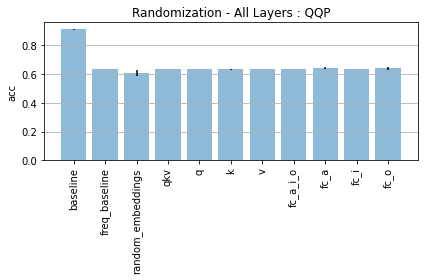

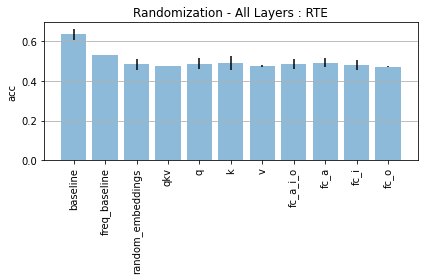

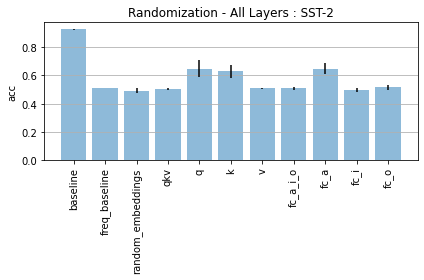

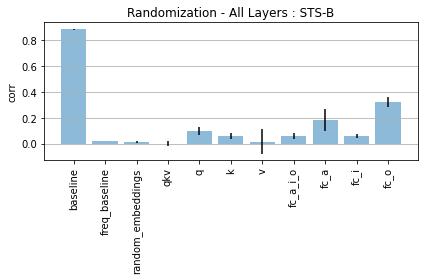

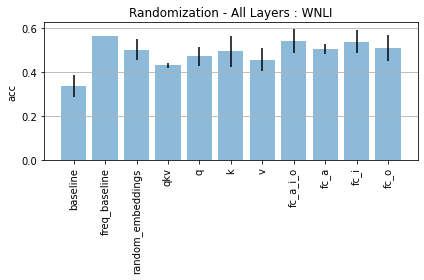

In [7]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
random_embeddings_path = experiments_path / "randomize_embeddings" / "results.json"
with random_embeddings_path.open() as f:
    random_embeddings = json.load(f)
analyzed_metrics.append(("random_embeddings", random_embeddings))

random_path = experiments_path / "randomize_qkv_together" / f"qkv_layer_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append((f"qkv", random_results))


for component in ["query", "key", "value"]:
    random_path = experiments_path / "randomize_qkv" / f"{component}_layer_all_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"{component[0]}", random_results))

random_path = experiments_path / "randomize_fc" / "fc_a_i_o_layer_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append(("fc_a_i_o", random_results))


random_path = experiments_path / "randomize_fc" / "fc_a_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append(("fc_a", random_results))

random_path = experiments_path / "randomize_fc" / "fc_i_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append(("fc_i", random_results))

random_path = experiments_path / "randomize_fc" / "fc_o_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append(("fc_o", random_results))

plot_all_task_metrics(analyzed_metrics, "Randomization - All Layers")


## Revert

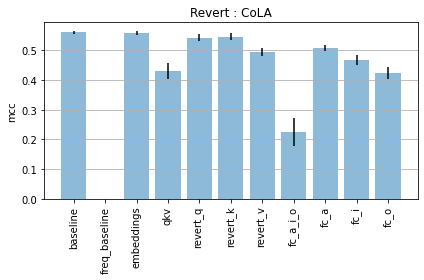

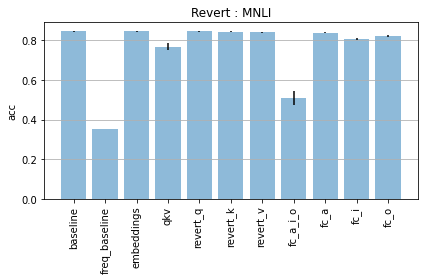

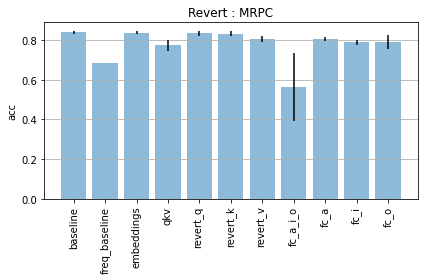

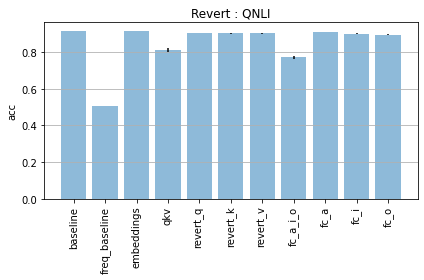

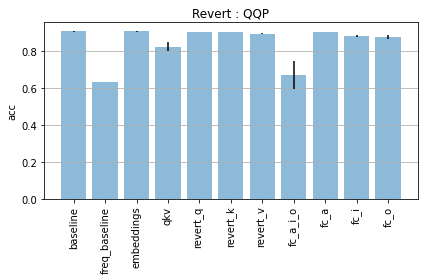

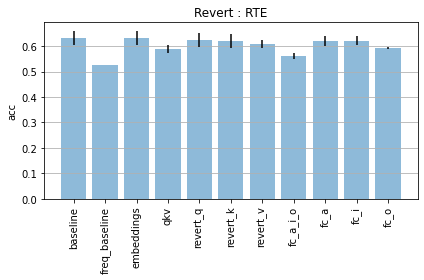

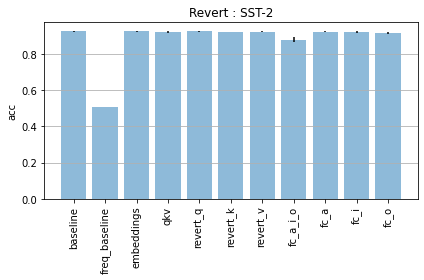

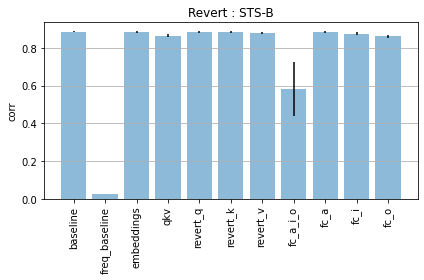

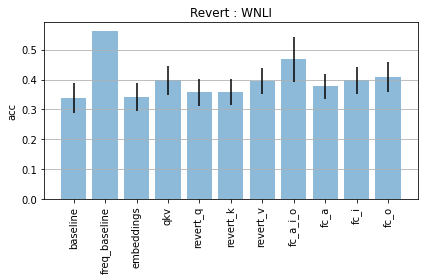

In [8]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
revert_path = experiments_path / "revert_embeddings" / "revert_embeddings_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("embeddings", revert_results))

revert_path = experiments_path / "revert_qkv" / "qkv_layer_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("qkv", revert_results))

for component in ["query", "key", "value"]:
    revert_path = experiments_path / "revert_qkv" / f"{component}_layer_all_results.json"
    with revert_path.open() as f:
        revert_results = json.load(f)
    analyzed_metrics.append((f"revert_{component[0]}", revert_results))


revert_path = experiments_path / "revert_fc" / "fc_a_i_o_layer_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("fc_a_i_o", revert_results))


revert_path = experiments_path / "revert_fc" / "fc_a_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("fc_a", revert_results))



revert_path = experiments_path / "revert_fc" / "fc_i_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("fc_i", revert_results))

revert_path = experiments_path / "revert_fc" / "fc_o_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append(("fc_o", revert_results))

plot_all_task_metrics(analyzed_metrics, "Revert")


# Comparision within Parts

## Embeddings - Baselines vs Random vs Revert


In [9]:
random_embeddings_path = experiments_path / "randomize_embeddings" / "results.json"
revert_embeddings_path = experiments_path / "revert_embeddings" / "revert_embeddings_results.json"
with random_embeddings_path.open() as f:
    random_embeddings = json.load(f)
with revert_embeddings_path.open() as f:
    revert_embeddings = json.load(f)
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline), ("random_embeddings", random_embeddings), ("revert_embeddings", revert_embeddings)]

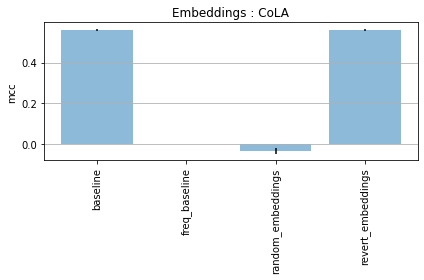

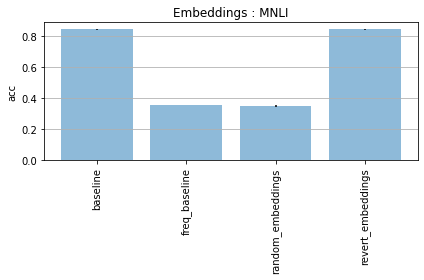

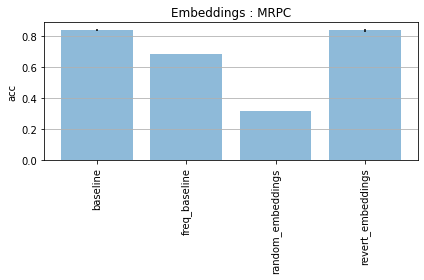

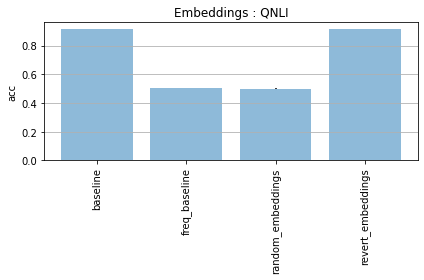

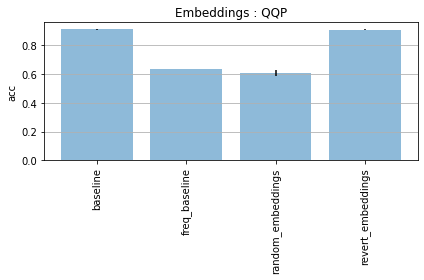

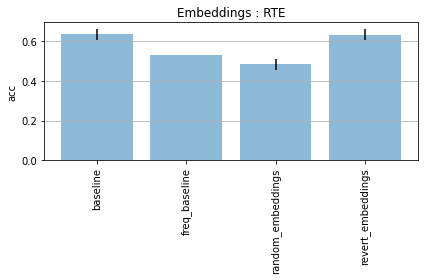

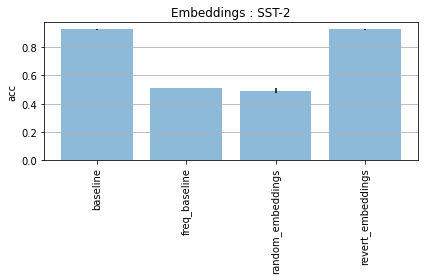

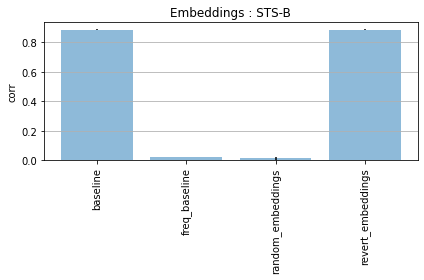

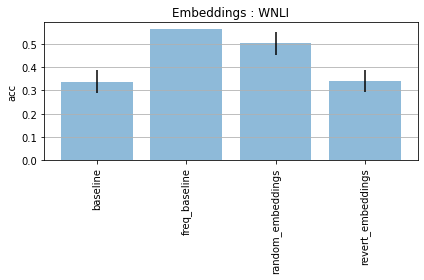

In [10]:
plot_all_task_metrics(analyzed_metrics, "Embeddings")

## All Layers - Baselines vs Randomize QKV vs Revert QKV 

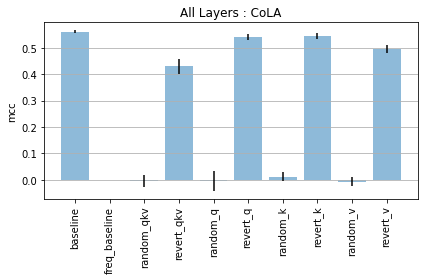

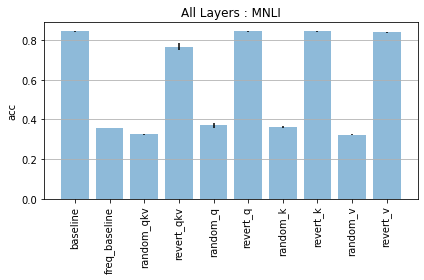

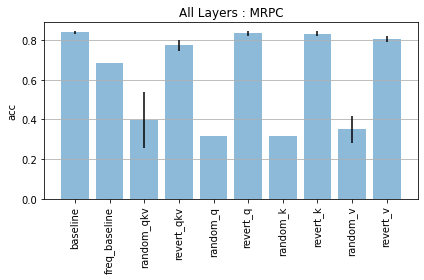

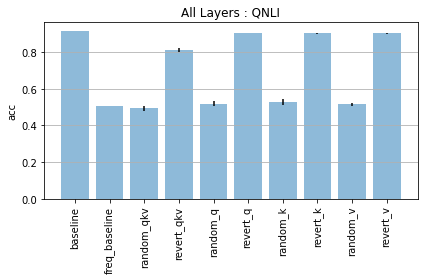

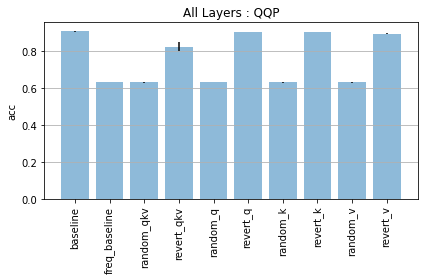

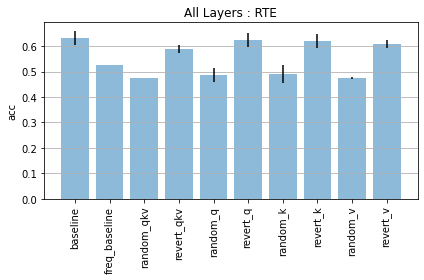

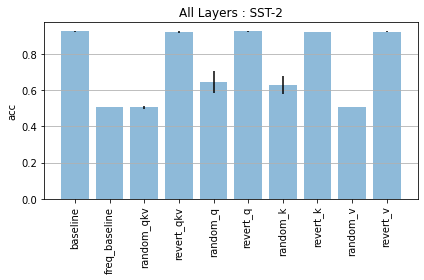

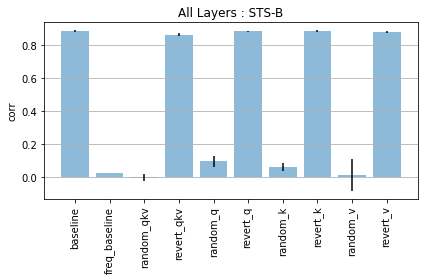

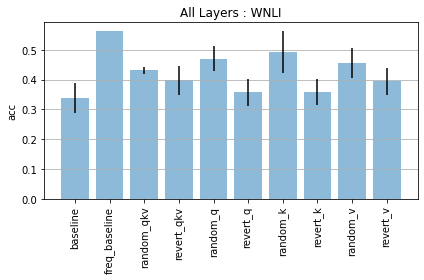

In [11]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]

random_path = experiments_path / "randomize_qkv_together" / f"qkv_layer_all_results.json"
with random_path.open() as f:
    random_results = json.load(f)
analyzed_metrics.append((f"random_qkv", random_results))

revert_path = experiments_path / "revert_qkv" / f"qkv_layer_all_results.json"
with revert_path.open() as f:
    revert_results = json.load(f)
analyzed_metrics.append((f"revert_qkv", revert_results))

for component in ["query", "key", "value"]:
    random_path = experiments_path / "randomize_qkv" / f"{component}_layer_all_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"random_{component[0]}", random_results))
    revert_path = experiments_path / "revert_qkv" / f"{component}_layer_all_results.json"
    with revert_path.open() as f:
        revert_results = json.load(f)
    analyzed_metrics.append((f"revert_{component[0]}", revert_results))
    
plot_all_task_metrics(analyzed_metrics, "All Layers")




## Randomize Layerwise


### QKV

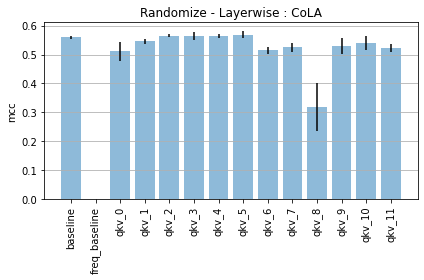

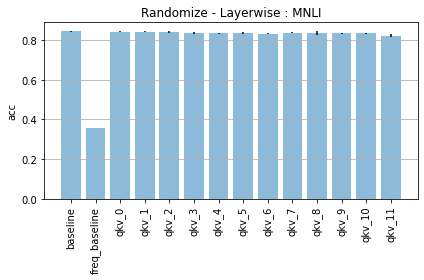

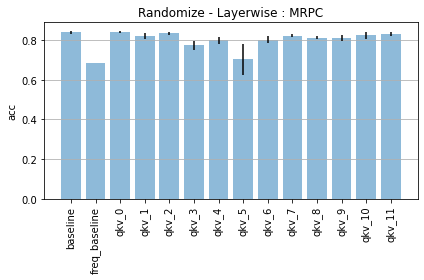

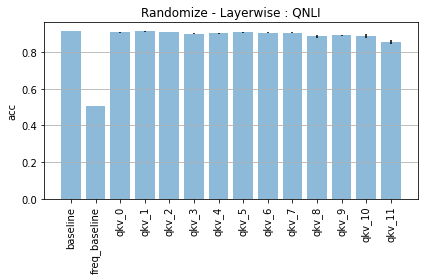

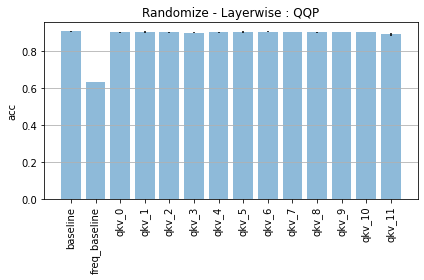

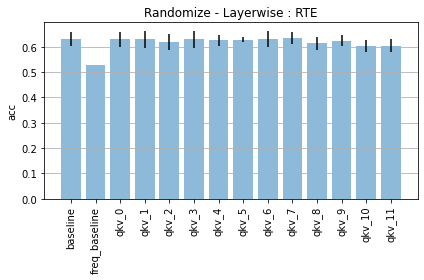

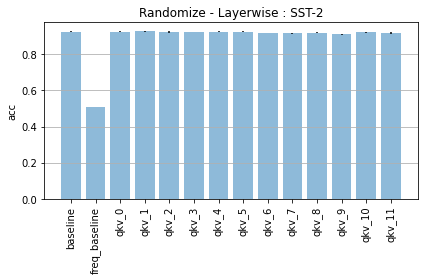

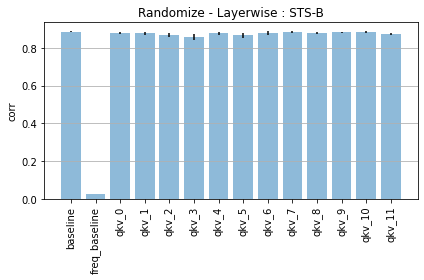

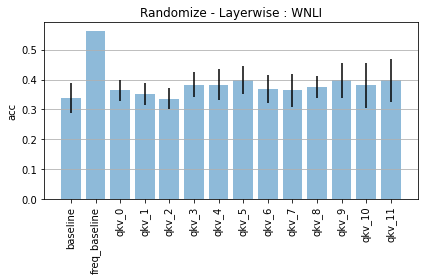

In [12]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer in range(12):
    random_path = experiments_path / "randomize_qkv_together" / f"qkv_layer_{layer}_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"qkv_{layer}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize - Layerwise")


### Randomize fully connected layers.

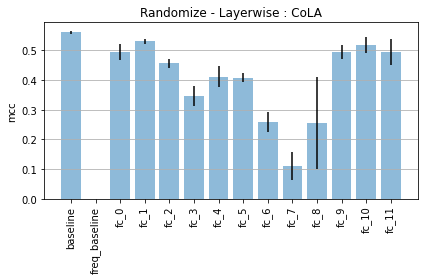

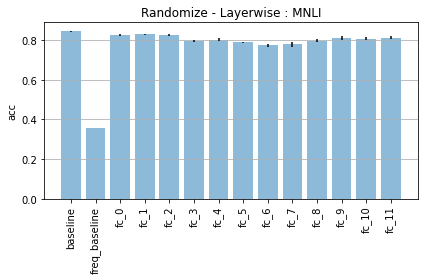

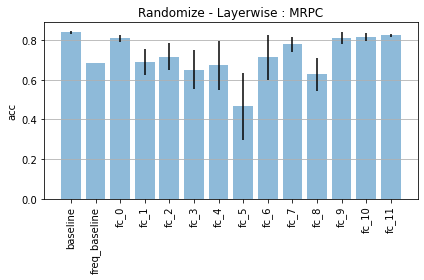

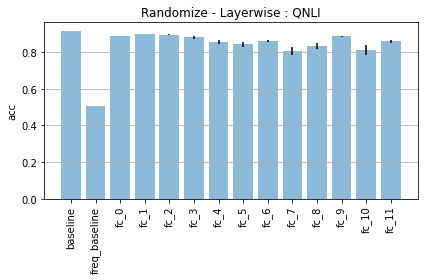

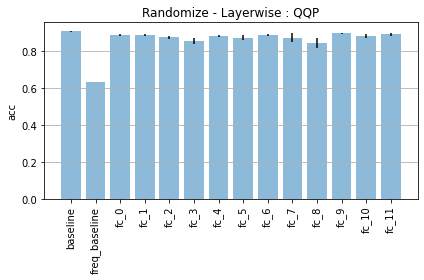

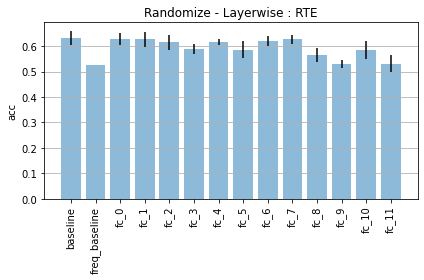

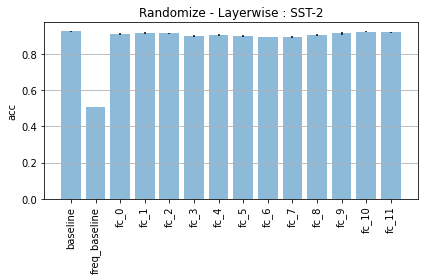

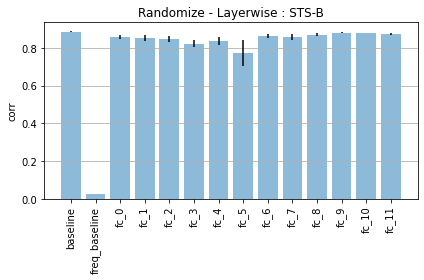

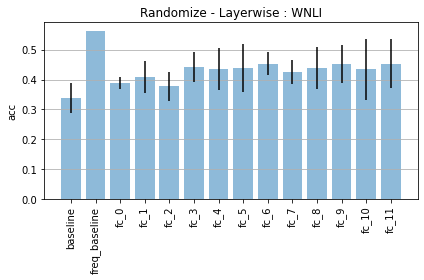

In [13]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer in range(12):
    random_path = experiments_path / "randomize_fc" / f"fc_a_i_o_layer_{layer}_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"fc_{layer}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize - Layerwise")

### All components in the layer

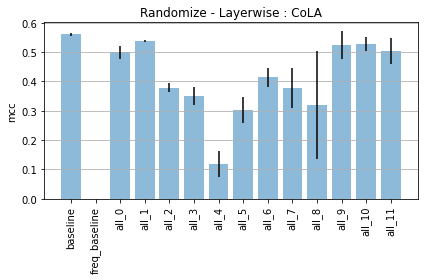

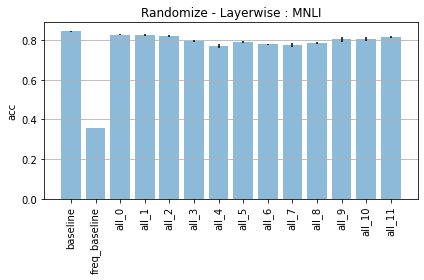

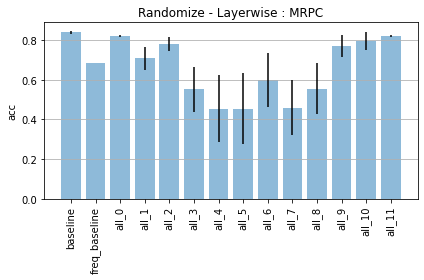

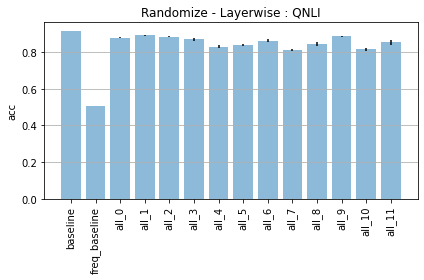

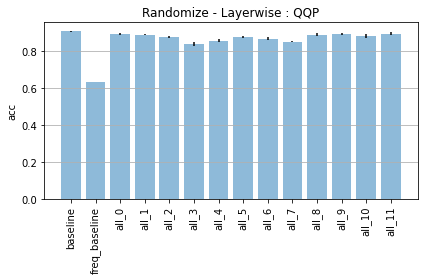

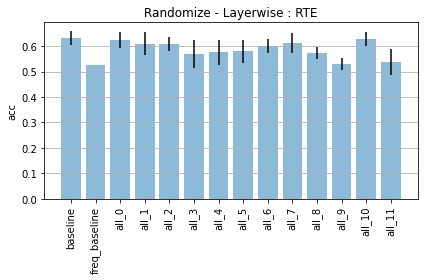

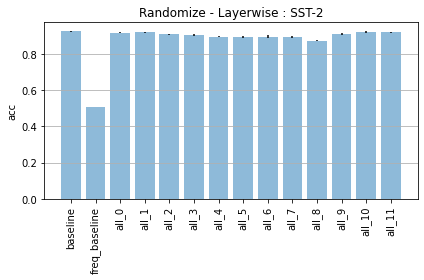

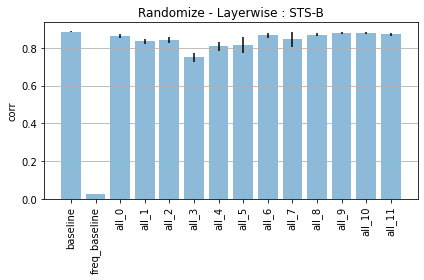

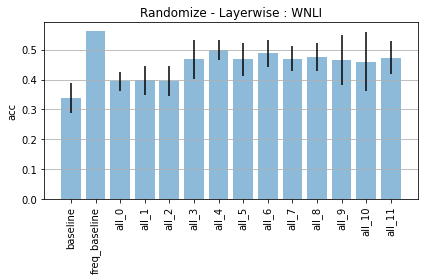

In [14]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer in range(12):
    random_path = experiments_path / "randomize_full_layerwise" / f"randomize_layer_{layer}_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"all_{layer}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize - Layerwise")

### Pairwise layers QKV

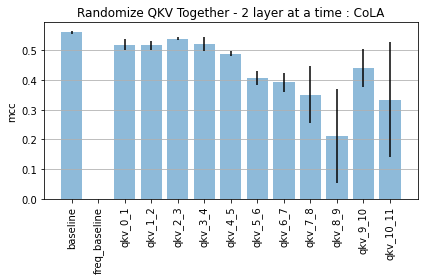

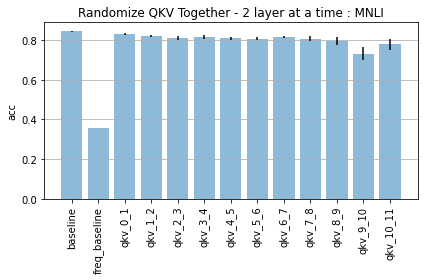

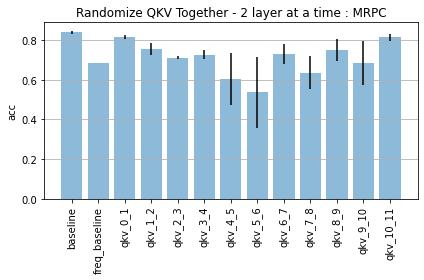

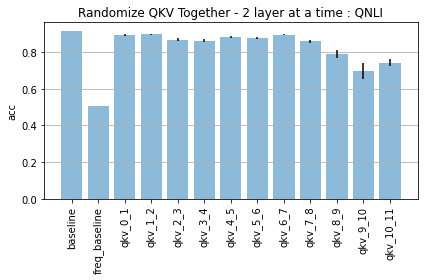

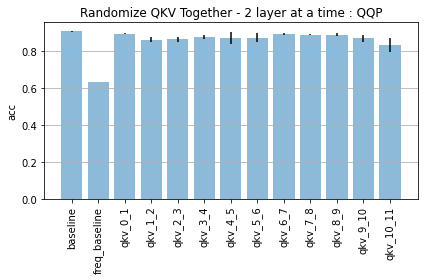

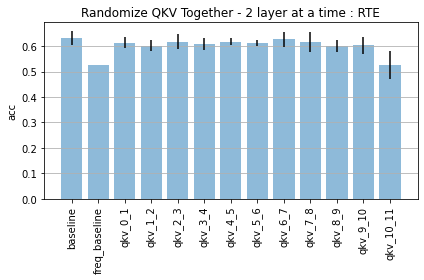

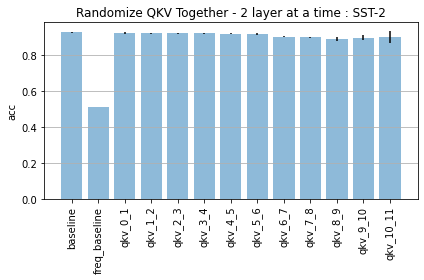

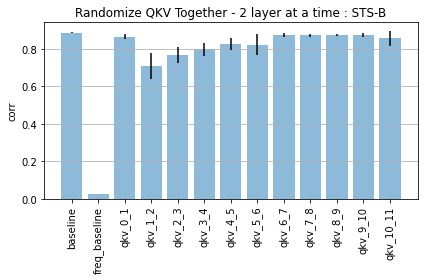

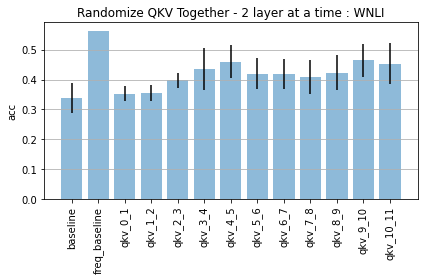

In [41]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer_0, layer_1 in zip(range(0, 11), range(1,12)):
    random_path = experiments_path / "randomize_qkv_together_pairwise" / f"qkv_layers_{layer_0}_{layer_1}_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"qkv_{layer_0}_{layer_1}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize QKV Together - 2 layer at a time")


### Pairwise Randomize all components

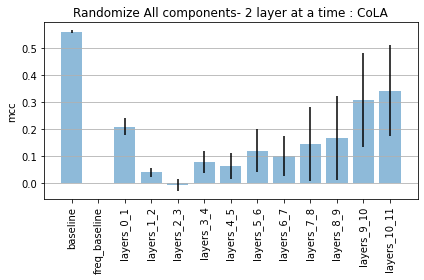

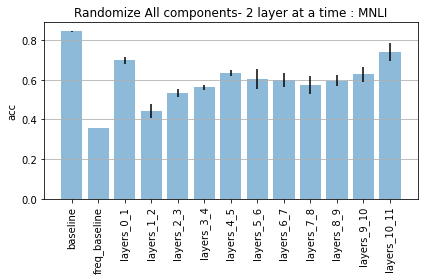

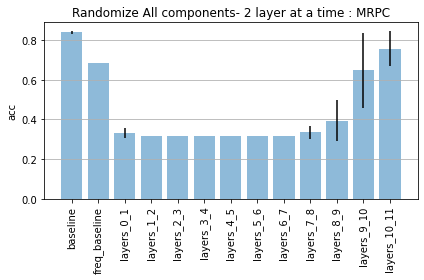

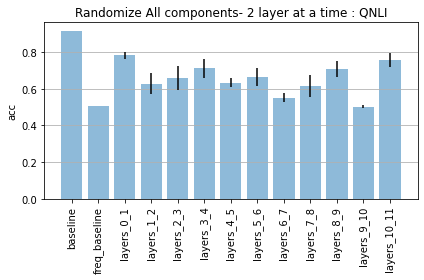

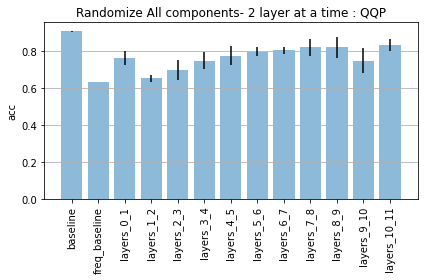

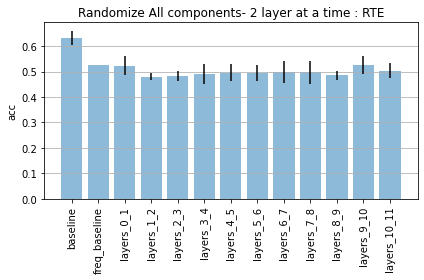

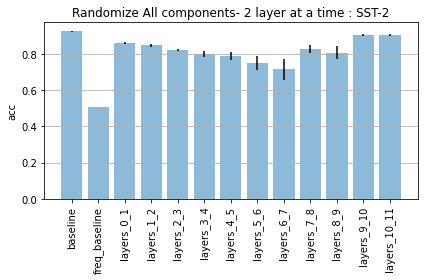

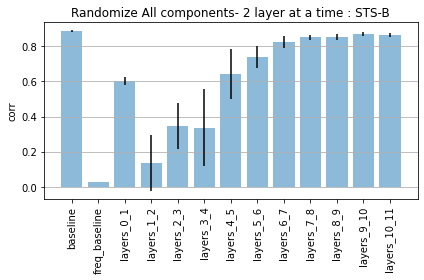

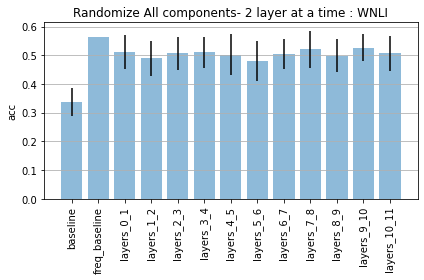

In [15]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer_0, layer_1 in zip(range(0, 11), range(1,12)):
    random_path = experiments_path / "randomize_full_layerwise" / f"randomize_layers_{layer_0}_{layer_1}_results.json"
    with random_path.open() as f:
        random_results = json.load(f)
    analyzed_metrics.append((f"layers_{layer_0}_{layer_1}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize All components- 2 layer at a time")


### Q vs K vs V

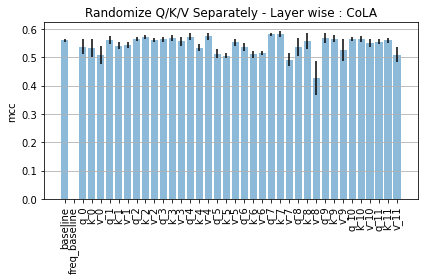

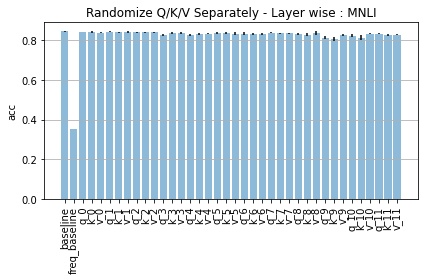

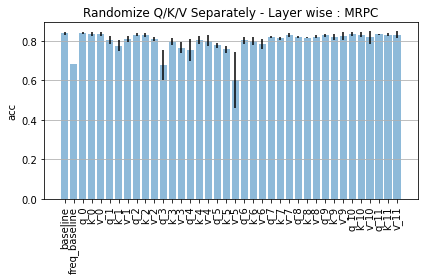

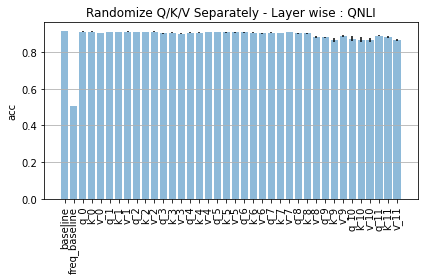

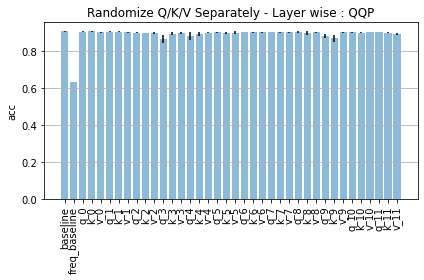

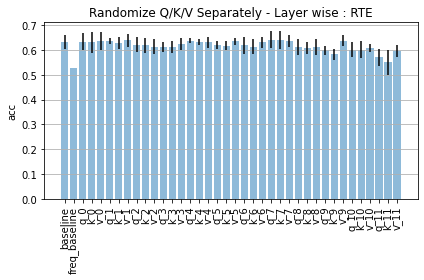

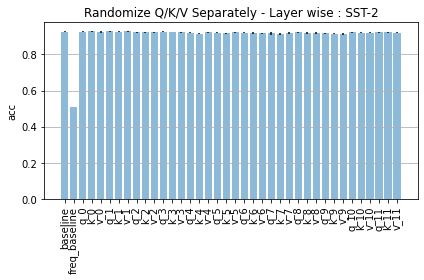

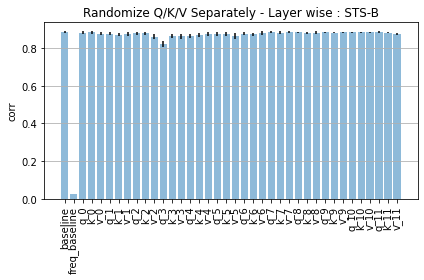

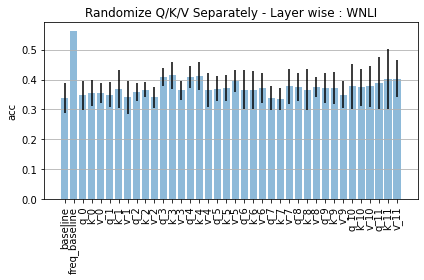

In [16]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
for layer in range(12):
    for component in ["query", "key", "value"]:
        random_path = experiments_path / "randomize_qkv" / f"{component}_layer_{layer}_results.json"
        with random_path.open() as f:
            random_results = json.load(f)
        analyzed_metrics.append((f"{component[0]}_{layer}", random_results))
plot_all_task_metrics(analyzed_metrics, "Randomize Q/K/V Separately - Layer wise")


## Revert Q,K,V,QK,QV,KV,QKV

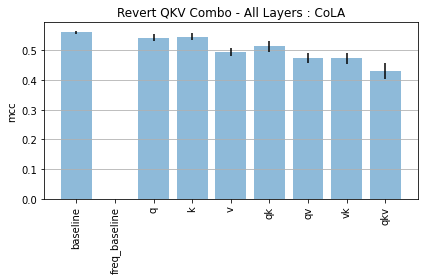

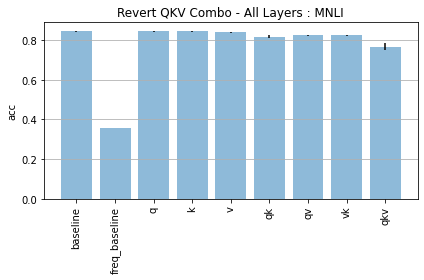

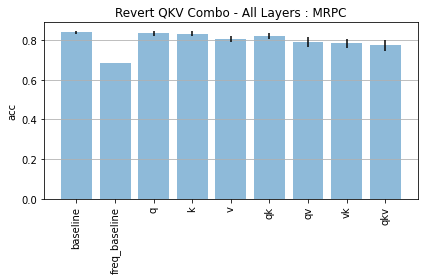

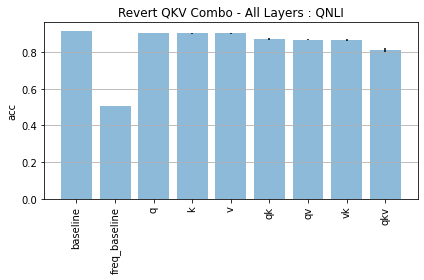

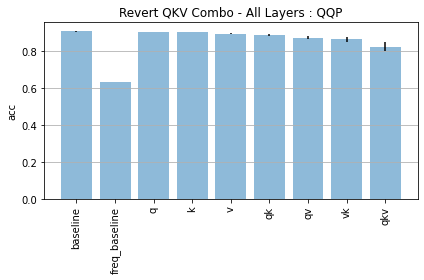

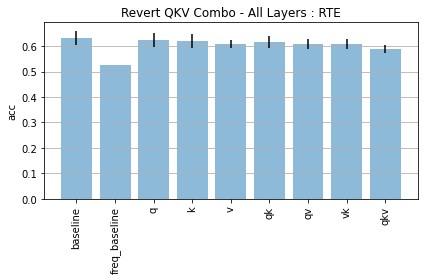

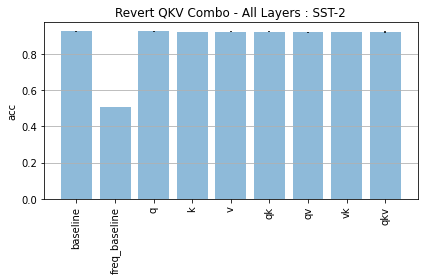

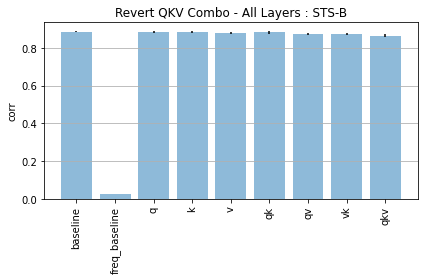

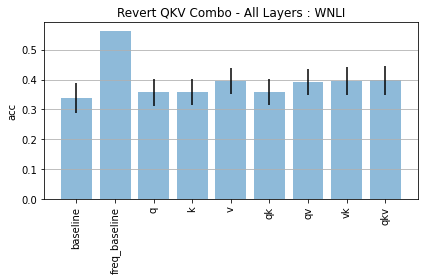

In [17]:
analyzed_metrics = [("baseline", baseline), ("freq_baseline", freq_baseline)]
file_path = experiments_path / "revert_qkv" / f"query_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"q", results))
file_path = experiments_path / "revert_qkv" / f"key_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"k", results))
file_path = experiments_path / "revert_qkv" / f"value_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"v", results))
file_path = experiments_path / "revert_qkv" / f"qk_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"qk", results))
file_path = experiments_path / "revert_qkv" / f"qv_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"qv", results))
file_path = experiments_path / "revert_qkv" / f"vk_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"vk", results))
file_path = experiments_path / "revert_qkv" / f"qkv_layer_all_results.json"
with file_path.open() as f:
    results = json.load(f)
    analyzed_metrics.append((f"qkv", results))

plot_all_task_metrics(analyzed_metrics, "Revert QKV Combo - All Layers")